##**1. Import Library**

In [1]:
# install category encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [2]:
# Common library used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Encoder
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

# Imbalanced Dataset
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

#Preprocessing ML
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.model_selection import cross_validate,cross_val_predict,cross_val_score,ShuffleSplit,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, SelectPercentile
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#metrics evaluation
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, label_ranking_average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

##**2. Load Dataset**

In [3]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Student Adaptivity in Online Learning/clean_dataset.csv')
df

,gender,age,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,class_duration,self_lms,device,adaptivity_level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,3-6,No,Computer,Low
252,Male,16-20,College,Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
253,Female,16-20,College,Non Government,No,No,Low,Middle Class,Mobile Data,1-3,Yes,Mobile,Low
254,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate


In [4]:
# check missing values
df.isna().sum()

gender                 0
age                    0
education_level        0
institution_type       0
it_student             0
location               0
load_shedding          0
financial_condition    0
internet_type          0
class_duration         0
self_lms               0
device                 0
adaptivity_level       0
dtype: int64

In [5]:
# check duplicated values
df.duplicated().sum()

15

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 255
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               241 non-null    object
 1   age                  241 non-null    object
 2   education_level      241 non-null    object
 3   institution_type     241 non-null    object
 4   it_student           241 non-null    object
 5   location             241 non-null    object
 6   load_shedding        241 non-null    object
 7   financial_condition  241 non-null    object
 8   internet_type        241 non-null    object
 9   class_duration       241 non-null    object
 10  self_lms             241 non-null    object
 11  device               241 non-null    object
 12  adaptivity_level     241 non-null    object
dtypes: object(13)
memory usage: 26.4+ KB


In [9]:
# View All Value Counts From Features/Columns
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column              value                 
adaptivity_level    High                23
                    Moderate           108
                    Low                110
age                 1-5                  8
                    6-10                13
                    26-30               18
                    11-15               42
                    16-20               63
                    21-25               97
class_duration      0                   40
                    3-6                 51
                    1-3                150
device              Tab                  6
                    Computer            41
                    Mobile             194
education_level     College             49
                    School              74
                    University         118
financial_condition Upper Class         23
                    Lower Class         47
                    Middle Class       171
gender              Female             102
                    Male               139
institution_type    Government          99
                    Non Government     142
internet_type       Wifi               113
                    Mobile Data        128
it_student          Yes                 73
                    No                 168
load_shedding       High                52
                    Low                189
location            No                  72
                    Yes                169
self_lms            Yes                 56
                    No                 185

In [10]:
df['age'].nunique()

6

In [11]:
binary_features = []
multiclass_features = []

for column in df.columns:
    if df[column].nunique() == 2:
        binary_features.append(column)
    elif df[column].nunique() > 2:
        multiclass_features.append(column)

print("Binary Features:", binary_features)
print("Multiclass Features:", multiclass_features)

Binary Features: ['gender', 'institution_type', 'it_student', 'location', 'load_shedding', 'internet_type', 'self_lms']
Multiclass Features: ['age', 'education_level', 'financial_condition', 'class_duration', 'device', 'adaptivity_level']


##**3. Feature Engineering**

###**b. Data Encoding**

In [26]:
# copy previous dataframe
df_fe = df.copy()
df_fe

,gender,age,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,class_duration,self_lms,device,adaptivity_level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,3-6,No,Computer,Low
252,Male,16-20,College,Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
253,Female,16-20,College,Non Government,No,No,Low,Middle Class,Mobile Data,1-3,Yes,Mobile,Low
254,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate


In [27]:
# list of columns according to data type
label = ['adaptivity_level']
ord_feats = ['education_level', 'financial_condition']
cat_feats = [cols for cols in df_fe.columns if (df_fe[cols].dtype=='O') and (cols not in ord_feats and cols not in label)]
num_feats = [cols for cols in df_fe.columns if (df_fe[cols].dtype=='int64') or (df_fe[cols].dtype=='float64')]

In [28]:
# Using pandas factorize method for ordinal data
label_enc = pd.Categorical(df_fe['adaptivity_level'], categories=['Low', 'Moderate', 'High'], ordered=True)

# mapping ordinal feature
ordinal_mapping_feature = [
    {'col': 'education_level',
    'mapping': {'School':0, 'College':1,'University':2}},
    {'col': 'financial_condition',
    'mapping': {'Lower Class':0, 'Middle Class':1,'Upper Class':2}}]

In [29]:
# encoding ordinal label with OrdinalEncoder
# Factorizing the column data
labels, unique = pd.factorize(label_enc, sort=True)
df_fe['adaptivity_level'] = labels

In [30]:
from category_encoders import OrdinalEncoder
# encoding ordinal features with OrdinalEncoder
ordinal_encoder = ce.OrdinalEncoder(cols=ord_feats, mapping=ordinal_mapping_feature)
df_fe = ordinal_encoder.fit_transform(df_fe)

In [33]:
from category_encoders import TargetEncoder
# encoding ordinal features with OrdinalEncoder
target_encoder = ce.TargetEncoder(cols=df_fe[cat_feats])
df_fe[cat_feats] = target_encoder.fit_transform(df_fe[cat_feats],df_fe['adaptivity_level'])

In [34]:
# check dataframe after encoding
df_fe

,gender,age,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,class_duration,self_lms,device,adaptivity_level
0,0.683453,0.659784,2,0.795774,0.595238,0.727811,0.666667,1,0.761051,0.834338,0.594595,0.710415,1
1,0.578448,0.659784,2,0.795774,0.595238,0.727811,0.542399,1,0.531252,0.720000,0.781812,0.582474,1
2,0.578448,0.525352,1,0.414225,0.595238,0.727811,0.666667,1,0.761051,0.720000,0.594595,0.582474,1
3,0.578448,0.706776,0,0.795774,0.595238,0.727811,0.666667,1,0.531252,0.720000,0.594595,0.582474,1
4,0.578448,0.525352,0,0.795774,0.595238,0.727811,0.666667,0,0.531252,0.142231,0.594595,0.582474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.683453,0.659784,2,0.795774,0.739226,0.431699,0.542399,1,0.531252,0.834338,0.594595,0.830240,0
252,0.683453,0.525352,1,0.414225,0.595238,0.727811,0.666667,1,0.531252,0.720000,0.594595,0.582474,1
253,0.578448,0.525352,1,0.795774,0.595238,0.431699,0.666667,1,0.531252,0.720000,0.781812,0.582474,0
254,0.683453,0.659784,2,0.795774,0.739226,0.431699,0.542399,1,0.531252,0.720000,0.781812,0.582474,1


###**b. Features Selection**

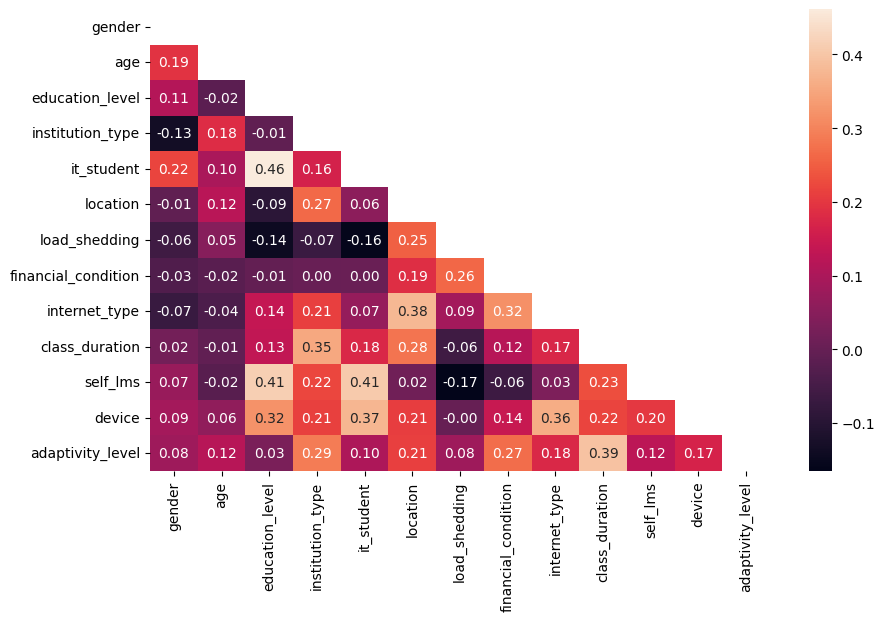

In [35]:
# check correlation all features with heatmap
corr_ = df_fe.corr()
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(df_fe.corr(), annot=True, fmt='.2f', mask=mask)
plt.show()


In [36]:
def calculate_VIF(data):
    X = sm.add_constant(data.iloc[:,:-1])
    vif_data = pd.DataFrame([variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))],
                        index = X.columns).reset_index()
    vif_data.columns = ['feature','VIF']
    vif_data = vif_data.loc[vif_data.feature!='const']

    return(vif_data)

In [37]:
calculate_VIF(df_fe)

,feature,VIF
1,gender,1.150290
2,age,1.134593
3,education_level,1.542113
4,institution_type,1.412512
5,it_student,1.567601
6,location,1.425963
7,load_shedding,1.209185
8,financial_condition,1.211837
9,internet_type,1.458613
10,class_duration,1.290675


##**4. Modeling**

In [55]:
# check dataframe
df_mod = df.copy()
df_mod

,gender,age,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,class_duration,self_lms,device,adaptivity_level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,3-6,No,Computer,Low
252,Male,16-20,College,Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
253,Female,16-20,College,Non Government,No,No,Low,Middle Class,Mobile Data,1-3,Yes,Mobile,Low
254,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate


###**a. Split Train & Test**

In [56]:
# mapping ordinal label
# Using pandas factorize method for ordinal data
label_enc = pd.Categorical(df_mod['adaptivity_level'], categories=['Low', 'Moderate', 'High'], ordered=True)

# encoding ordinal label with Factorizing
labels, unique = pd.factorize(label_enc, sort=True)
df_mod['adaptivity_level'] = labels

In [60]:
# split dataset
from sklearn.model_selection import train_test_split

X = df_mod.drop(columns=['adaptivity_level'])
y = df_mod['adaptivity_level']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.20, random_state= 42)

In [61]:
# check sample after split
for x in [X_train, y_train, X_test, y_test]:
    print(x.shape)

(192, 12)
(192,)
(49, 12)
(49,)


In [62]:
import numpy as np

# Assume that y is a list or array containing the class labels of your dataset
unique_labels, counts = np.unique(y, return_counts=True)
proportions = counts / len(y)

# Calculate Shannon entropy
shannon_entropy = -np.sum(proportions * np.log(proportions))

print(f'Shannon entropy: {shannon_entropy:.2f}')

Shannon entropy: 0.94


In [63]:
len(df_mod)

241

In [64]:
df_mod.adaptivity_level.value_counts()

0    110
1    108
2     23
Name: adaptivity_level, dtype: int64

In [65]:
import numpy as np

# Generate synthetic imbalanced dataset
num_samples = 241
num_class_0 = 110
num_class_1 = 108
num_class_2 = 23

# Class 0 samples
X0 = np.random.normal(0, 1, size=(num_class_0, 2))
y0 = np.zeros(num_class_0)

# Class 1 samples
X1 = np.random.normal(1, 1, size=(num_class_1, 2))
y1 = np.ones(num_class_1)

# Class 2 samples
X2 = np.random.normal(2, 1, size=(num_class_2, 2))
y2 = np.full(num_class_2, 2)

# Combine class samples
X = np.concatenate((X0, X1, X2))
y = np.concatenate((y0, y1, y2))

# Calculate Shannon entropy
unique_labels, counts = np.unique(y, return_counts=True)
proportions = counts / len(y)
shannon_entropy = -np.sum(proportions * np.log(proportions))

print(f'Shannon entropy: {shannon_entropy:.2f}')


Shannon entropy: 0.94


>- Based on the Shannon entropy scores, it can be stated that the classes within the labels have an imbalanced proportion that can be categorized as mild imbalance (Mild Imbalance Data)/not extreme imbalance.
- The higher the Shannon entropy score (closer to 1), the more balanced the class proportions within the labels are. Conversely, a lower score (closer to 0) indicates that the class proportions within the labels are more imbalanced.

###**b. Pipeline**

In [66]:
# use ColumnTransformer to encode features for pipeline purposes
preprocessor = ColumnTransformer(
      transformers=[('nominal_feature', target_encoder, cat_feats),
                    ('ordinal_feature', ordinal_encoder, ord_feats)])

In [67]:
set_config(display='diagram')

###**c. Modeling**

In [68]:
# define the ml algoritms
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svc = SVC(random_state=42)

In [69]:
from sklearn.preprocessing import label_binarize

def average_precision_ovr(y_true, y_score):
    n_classes = len(np.unique(y_true))
    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

    avg_precisions = []
    for i in range(n_classes):
        avg_precision = average_precision_score(y_true_bin[:, i], y_score[:, i])
        avg_precisions.append(avg_precision)

    mean_avg_precision = np.mean(avg_precisions)
    return mean_avg_precision

In [70]:
# define the metrics evaluation for multiclass label

metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'roc_auc_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True),
    'average_precision_micro': make_scorer(average_precision_ovr, needs_proba=True)
}

In [71]:
# create empty list for save result after cross validation
models = []
scores = []

In [72]:
ml_models = [logreg, dt, rf, xgb, svc]

for i in ml_models:
    skfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    estimator = Pipeline([
            ('preprocessor', preprocessor),
            ('model', i)])

    cross_val = cross_validate(estimator,
                               X_train, y_train,
                               cv=skfold,
                               scoring=metrics,
                               n_jobs=-1)
    models.append(f'{i.__class__.__name__}')
    scores.append(list(cross_val.values())[2:])

####**- Benchmark Model**

In [73]:
df_models = pd.DataFrame([[scores[i][j].mean() for j in range(len(metrics))] for i in range(len(models))],
                         index=models,
                         columns=metrics).sort_values('average_precision_micro', ascending=False)

df_models

,accuracy,precision_micro,recall_micro,f1_micro,roc_auc_micro,average_precision_micro
LogisticRegression,0.598684,0.598684,0.598684,0.598684,0.800335,0.657832
XGBClassifier,0.462895,0.462895,0.462895,0.462895,0.711452,0.538048
RandomForestClassifier,0.520789,0.520789,0.520789,0.520789,0.720198,0.516001
DecisionTreeClassifier,0.452105,0.452105,0.452105,0.452105,0.582255,0.375913
SVC,0.526579,0.526579,0.526579,0.526579,NaN,NaN


###**d. Hyperparameter Tuning**

In [74]:
tuned_models = ['RandomForestClassifierTuned', 'XGBClassifierTuned']
fine_tuned_models = []
tuned_scores = []

In [75]:
%%time
# define the parameters for random forest model's tuned
rfr_params = {
    'forest__n_estimators': list(np.arange(10, 300)),
    'forest__max_depth': list(np.arange(1, 20)),
    'forest__min_samples_split': [2, 5, 10],
    'forest__min_samples_leaf': [1, 2, 3, 4, 5],
    'forest__max_features': ['auto', 'sqrt'],
    'forest__bootstrap': [True, False],
    'forest__criterion': ["gini", "entropy"]
}

Random_Forest_tuned = RandomForestClassifier(random_state=42)
forest_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('forest',Random_Forest_tuned)])
forest_pipe_tuned.fit(X_train, y_train)

forest_cv = RandomizedSearchCV(forest_pipe_tuned,
                               rfr_params,
                               scoring=metrics,
                               refit= 'average_precision_micro',
                               error_score='raise',
                               n_jobs=-1,
                               verbose=1,
                               cv=skfold)
forest_cv.fit(X_train, y_train)
print(forest_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'forest__n_estimators': 179, 'forest__min_samples_split': 10, 'forest__min_samples_leaf': 5, 'forest__max_features': 'sqrt', 'forest__max_depth': 12, 'forest__criterion': 'entropy', 'forest__bootstrap': True}
CPU times: user 1.7 s, sys: 97.7 ms, total: 1.8 s
Wall time: 45 s


In [76]:
%%time
# Define the parameters for XGBoost tuned
xgb_params = {
    'xgb__n_estimators': [100, 200, 250, 400, 500],
    'xgb__max_depth': [5, 10, 15, 20],
    'xgb__learning_rate': [0.05, 0.01, 0.1],
    'xgb__subsample': [0.5, 1],
    'xgb__colsample_bytree': [0.8, 0.9],
    'xgb__min_child_weight': [1],
    'xgb__gamma': [i/10.0 for i in range(0, 6)],
    'xgb__reg_lambda': [0, 0.5, 1, 1.5, 2, 3, 4.5]
}

XGBoost_tuned = XGBClassifier(random_state=42)
xgb_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('xgb',XGBoost_tuned)])
xgb_pipe_tuned.fit(X_train, y_train)

xgb_cv = RandomizedSearchCV(xgb_pipe_tuned,
                               xgb_params,
                               scoring=metrics,
                               refit= 'average_precision_micro',
                               error_score='raise',
                               n_jobs=-1,
                               verbose=1,
                               cv=skfold)
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'xgb__subsample': 0.5, 'xgb__reg_lambda': 4.5, 'xgb__n_estimators': 100, 'xgb__min_child_weight': 1, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.5, 'xgb__colsample_bytree': 0.9}
CPU times: user 3.44 s, sys: 105 ms, total: 3.54 s
Wall time: 46.1 s


###**e. Evaluation Metrics**

In [77]:
forest_results = forest_cv.cv_results_
xgb_results = xgb_cv.cv_results_

forest_scores = {metric: forest_results['mean_test_' + metric][forest_cv.best_index_] for metric in metrics}
xgb_scores = {metric: xgb_results['mean_test_' + metric][xgb_cv.best_index_] for metric in metrics}

forest_df = pd.DataFrame(forest_scores, index=['RandomForest_tuned'])
xgb_df = pd.DataFrame(xgb_scores, index=['XGBoost_tuned'])

consolidated_df = pd.concat([forest_df, xgb_df])
consolidated_df = consolidated_df.sort_values('average_precision_micro', ascending=False)

consolidated_df

,accuracy,precision_micro,recall_micro,f1_micro,roc_auc_micro,average_precision_micro
RandomForest_tuned,0.568158,0.568158,0.568158,0.568158,0.797008,0.660154
XGBoost_tuned,0.588684,0.588684,0.588684,0.588684,0.794542,0.644631


In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize


def plot_micro_roc_auc(model, X_test, y_test, n_classes):
    """
    Plot the micro-averaged ROC AUC curve for a given trained Random Forest model and test data in a multiclass scenario.

    Parameters:
    - model: trained Random Forest classifier
    - X_test: test features
    - y_test: true labels for test data
    - n_classes: number of classes
    """
    # Binarize the labels for multiclass
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
    y_score = model.predict_proba(X_test)

    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # Plot ROC curve
    plt.figure(figsize=(10, 7))
    plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label='Micro-averaged ROC curve (AUC = %0.2f)' % roc_auc_micro)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Micro-averaged Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


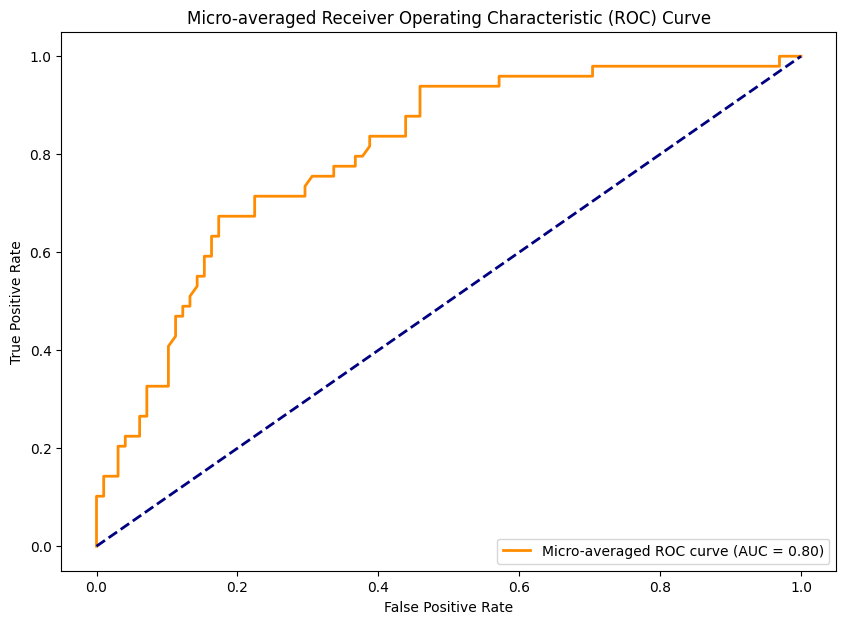

In [79]:
plot_micro_roc_auc(forest_cv.best_estimator_, X_test, y_test, n_classes=3)

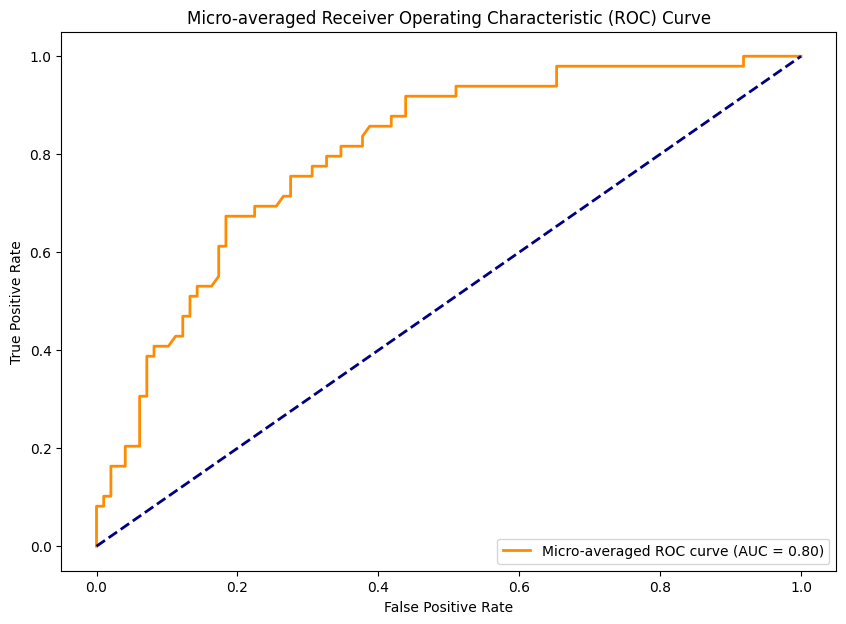

In [80]:
plot_micro_roc_auc(xgb_cv.best_estimator_, X_test, y_test, n_classes=3)

In [81]:
def plot_average_precision_micro(model, X_test, y_test, n_classes=3):
    # Binarize labels
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # Get probabilities
    y_score = model.predict_proba(X_test)

    # Compute Precision-Recall and average precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # Compute micro-average ROC curve and ROC area
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

    # Plot
    plt.figure(figsize=(10,7))
    plt.step(recall['micro'], precision['micro'], where='post', label=f"Micro-averaged PR-AUC curve (AUC = {average_precision['micro']:.2f})")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Micro-averaged Precision-Recall (PR-AUC) Curve')
    plt.legend(loc='lower right')
    plt.show()

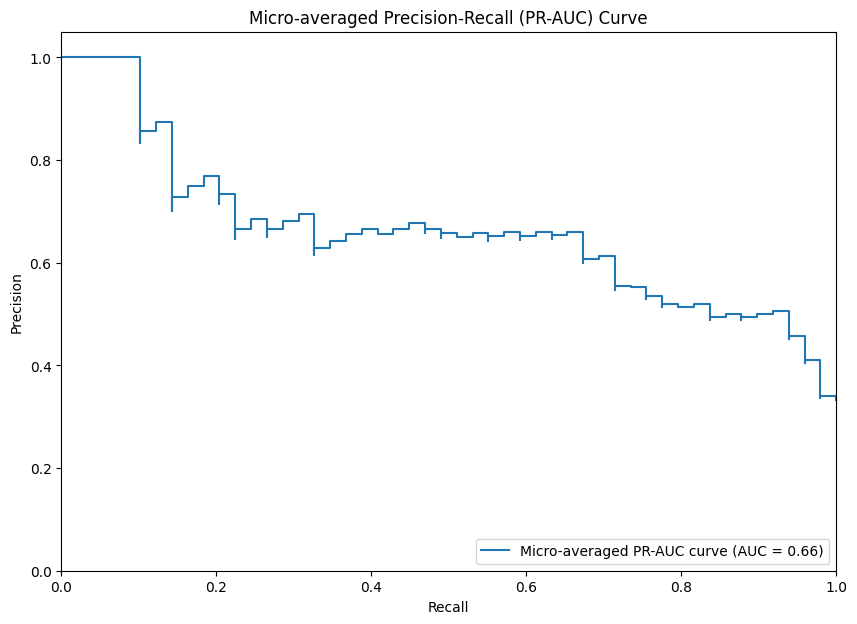

In [82]:
plot_average_precision_micro(forest_cv.best_estimator_, X_test, y_test, n_classes=3)

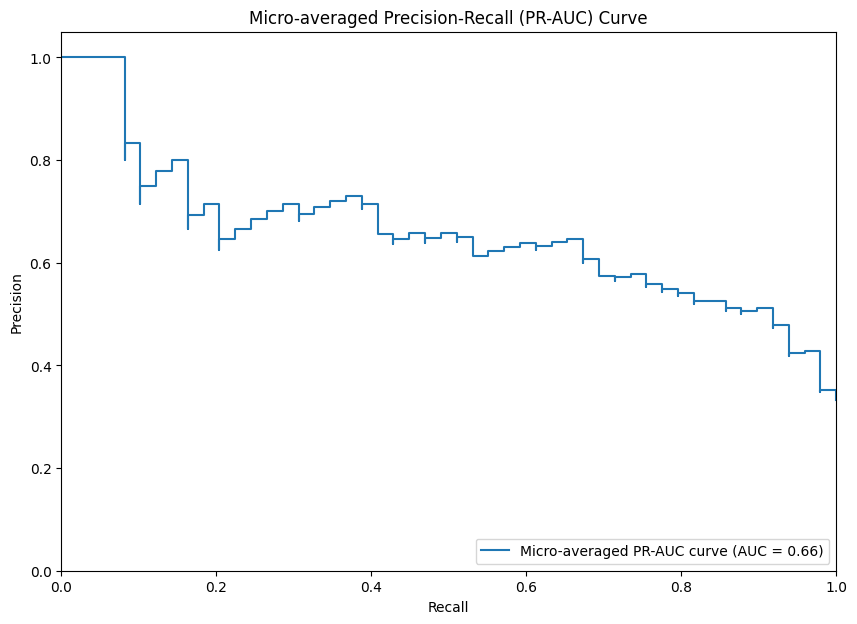

In [83]:
plot_average_precision_micro(xgb_cv.best_estimator_, X_test, y_test, n_classes=3)

###**f. Feature Importances**

In [84]:
import matplotlib.pyplot as plt

def plot_feature_importances(pipeline, feature_names):
    # Mendapatkan model dari pipeline
    model = pipeline.steps[-1][1]

    # Memeriksa apakah model memiliki atribut 'feature_importances_'
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        raise AttributeError("Model tidak memiliki atribut 'feature_importances_'.")

    # Mengurutkan fitur berdasarkan importances
    indices = importances.argsort()[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]
    sorted_importances = importances[indices]

    # Membuat plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), sorted_importances, align='center')
    plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Fitur')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()


In [85]:
feature_names = ['gender', 'age', 'education_level', 'institution_type', 'it_student',
       'location', 'load_shedding', 'financial_condition', 'internet_type',
       'class_duration', 'self_lms', 'device',]

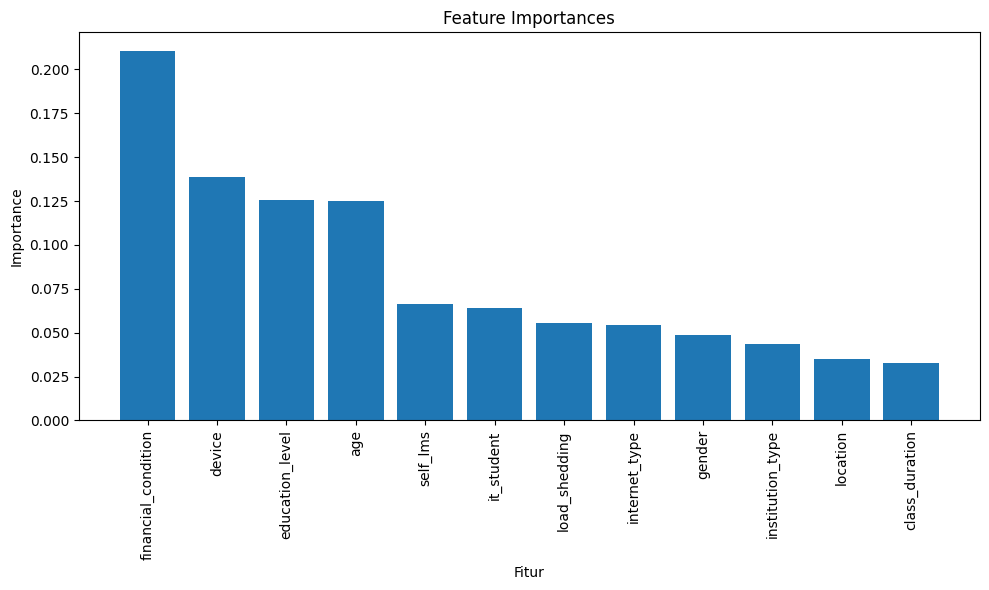

In [86]:
plot_feature_importances(forest_cv.best_estimator_, feature_names)

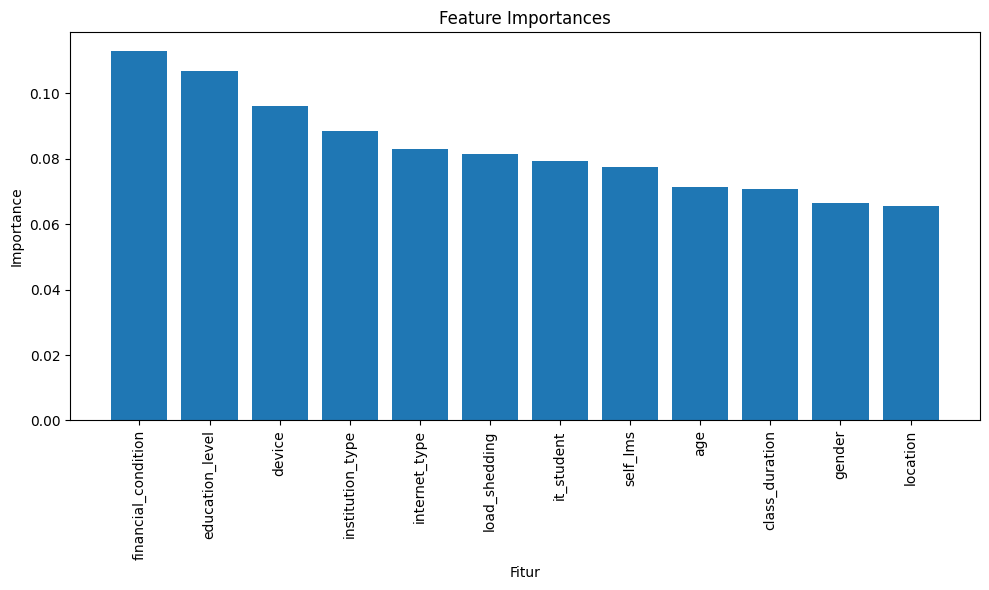

In [88]:
plot_feature_importances(xgb_cv.best_estimator_, feature_names)

##**5.Deployment**

###**a. Save Best Model ML with pickle**

In [89]:
import pickle

In [ ]:
pickle.dump(xgb_cv.best_estimator_,open('xgb_fix_tuned.pkl','wb'))

###**b.Load Best Model ML for Model Inference**

In [ ]:
model = pickle.load(open('xgb_fix_tuned.pkl','rb'))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  TargetEncoder(),
                                                  ['gender', 'age',
                                                   'institution_type',
                                                   'it_student', 'location',
                                                   'load_shedding',
                                                   'internet_type',
                                                   'class_duration', 'self_lms',
                                                   'device']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['education_level',
                                                                       'financial_condition'],
                                                                 mapping=[{'col': 'education_level',
                                                                           'data_type': dtype(...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
df.columns

Index(['gender', 'age', 'education_level', 'institution_type', 'it_student',
       'location', 'load_shedding', 'financial_condition', 'internet_type',
       'class_duration', 'self_lms', 'device', 'adaptivity_level'],
      dtype='object')

In [ ]:
df

,gender,age,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,class_duration,self_lms,device,adaptivity_level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,3-6,No,Computer,Low
252,Male,16-20,College,Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
253,Female,16-20,College,Non Government,No,No,Low,Middle Class,Mobile Data,1-3,Yes,Mobile,Low
254,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate


In [ ]:
new_data = [{'gender': 'Female',
             'age': '0-5',
             'education_level': 'School',
             'institution_type':'Non Government',
             'it_student': 'No',
             'location': 'Yes',
             'load_shedding': 'Low',
             'financial_condition': 'Lower Class',
             'internet_type':'Wifi',
             'class_duration': '1-3',
             'self_lms': 'Yes',
             'device':'Computer'}
             ]

data_testing1= pd.DataFrame(new_data,index=[0])
data_testing1

,gender,age,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,class_duration,self_lms,device
0,Female,0-5,School,Non Government,No,Yes,Low,Lower Class,Wifi,1-3,Yes,Computer


In [ ]:
def prediction(pred):
    if pred[0]==0:
        return "Adaptivity Level = Low"
    elif pred[0]==1:
        return "Adaptivity Level = Moderate"
    elif pred[0]==2:
        return "Adaptivity Level = High"

In [ ]:
pred = model.predict(data_testing1)

In [ ]:
prediction(pred)

'Adaptivity Level = Moderate'

##**6. Conclusion**

###**In English**

>Model Evaluation:
>
>- The challenge of using this dataset lies in its imbalanced classes, which in most cases need to be addressed using resampling techniques like SMOTE or by applying class weights to prevent model bias during label/target prediction.
- Suitable evaluation metrics include f1_score, recall, or pr-auc, as these are more sensitive to minority classes due to the imbalance in the dataset across labels.
- Based on the benchmark model results, the model with the highest average precision (pr-auc) score is Logistic Regression (LogReg).
- We chose the Random Forest Classifier and XGBoost Classifier models for further evaluation, as these models are resistant to multicollinearity and do not require the assumption of linearity in the correlation between features and labels.
- However, all existing ML models exhibit subpar performance when viewed from the standpoint of average precision scores (< 0.60). Several factors contribute to this poor performance, including: 1) lack of information due to the dataset having multiple classes with significant imbalances and limited samples, 2) interactions between features as well as between features and labels that require complexity for the model to capture specific patterns.
- From the hyperparameter tuning process, it is evident that the XGBoost model outperforms the Random Forest model, as seen from their respective PR-AUC curves. The tuned XGBoost model achieved a PR-AUC score of 0.66, whereas the Random Forest model scored 0.62.
- Based on these findings, the XGBoost model will be selected for deployment.
>
>Model Implementation:
>- This model can serve as a support system for teachers or educational service providers to predict students' adaptability in online learning.
- The model is more effective and efficient when integrated into a website system or cloud computing server, as it allows for rapid and massive data collection from students without requiring manual supervision or data entry.
>
>Recommendations:
>- The model could be further developed by employing a more complex and larger dataset, allowing it to better adapt to the complexities involved in predicting labels/targets more expertly.

###**In Indonesian**

>Evaluasi Model:
- Tantangan dari penggunaan dataset ini yaitu dataset memiliki kelas yang imbalance yang kebanyakan kasus perlu ditangani menggunakan teknik resampling baik SMOTE atau class weight agar tidak menimbulkan bias bagi model saat memprediksi label/target.
- Metrik evaluasi yang cocok digunakan yaitu f1_score, recall, atau pr-auc karena lebih sensitif terhadap kelas minoritas, sebab sampel data yang tidak seimbang antar kelas pada label (imbalance dataset).
- Berdasarkan hasil benchmark model, model dengan skor average precision (pr-auc) dengan rata-rata paling tinggi yaitu model Logistic Regression (LogReg).
- Disini kita memilih model Random Forest Classifier dan XGBoost Classifier,  karena kedua model ini tahan terhadap multikolinearitas  dan tidak memerlukan asumsi linearitas dalam sebuah korelasi antara fitur dengan label.
- Walaupun demikian, semua model ML yang ada menunjukan performa yang kurang baik jika dilihat dari rata-rata skor average precision (< 0.60). ada beberapa faktor yang menyebabkan rendahnya performa dari model ML yang ada, diantaranya: 1) kekurangan informasi karena dataset memiliki banyak kelas dengan ketidakseimbangan yang signifikan antar kelas serta terbatasnya sampel, 2) interaksi antar fitur dan juga fitur dengan label yang memerlukan kompleksitas untuk model dapat menangkap pola tertentu.
- Dari hasil proses hyperparameter tuning terlihat jika dalam model XGBoost memiliki performa yang lebih baik daripada Random Forest dilihat dari plot kurva PR-AUC dari kedua model tersebut. Model XGBoost setelah dituning mendapatkan PR-AUC score = 0.66, sedangkan Random Forest mendapatkan PR-AUC score = 0.62.
- Dari kasus tersebut, Model XGBoost akan dipilih untuk deployment
>
>Implementasi Model:
- Model ini dapat digunakan sebagai support sistem bagi para guru atau penyedia layanan pendidikan untuk dapat memprediksi kemampuan adaptasi siswa dalam pembelajaran online
- Model ini lebih efektif dan efisien untuk diterapkan kedalam sistem website atau server/cloud computing agar dapat merekam pendataan siswa yang secara masif dan cepat tanpa memerlukan pengawasan dan penginputan data secara manual.
>
>Rekomendasi:
- Model dapat dikembangkan dengan menggunakan dataset yang lebih kompleks fitur dan besar jumlah sampelnya, sehingga model dapat lebih beradapatasi dengan kompleksitas untuk memprediksi label/target secara lebih expert lagi.
